In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd


import gpflow
import tensorflow as tf
from gpflow.utilities import print_summary
from gpflow.ci_utils import ci_niter
from datetime import datetime
#

gpflow.config.set_default_float(np.float64)
gpflow.config.set_default_summary_fmt("notebook")

In [3]:
df = pd.read_csv('./data_corrected.csv')

In [4]:
g = 20
Xarr = df[['LAT','LON']].values[::g]
Yarr = df.PM10.values[::g].reshape(-1,1)


mn=Yarr.mean()
sd=Yarr.std()
mi=Yarr.min()

# Yarr = np.log10(Yarr)
Yarr -= mi-1
Yarr = np.log10(Yarr)
# Xarr[:,0]-= Xarr[:,0].mean()
# Xarr[:,1]-= Xarr[:,1].mean()

Xarr[1],Yarr[1],Yarr.mean()


(array([51.50455319, -0.14204655]), array([2.19862]), 0.8456184260082402)

In [5]:

kernel =  gpflow.kernels.Matern52(active_dims=[0], lengthscales=2) + \
gpflow.kernels.Matern52(active_dims=[1], lengthscales=2)

# kernel =  gpflow.kernels.Matern52(lengthscales=[1,2])

# kernel=gpflow.kernels.Polynomial(1,degree=2.,active_dims=[0],ARD=True) + gpflow.kernels.Polynomial(1,degree = 2., active_dims=[1],ARD=True)

m = gpflow.models.GPR(data=(Xarr, Yarr), kernel=kernel, mean_function=None)
m.trainable_variables

m.likelihood.variance.assign(0.01)


opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=1000))
print_summary(m)

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.714445
GPR.kernel.kernels[0].lengthscales,Parameter,Softplus,,True,(),float64,10.6252
GPR.kernel.kernels[1].variance,Parameter,Softplus,,True,(),float64,1.65091e-21
GPR.kernel.kernels[1].lengthscales,Parameter,Softplus,,True,(),float64,50.1106
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.213794


In [6]:
i = np.linspace(Xarr[:,0].min(), Xarr[:,0].max(), 100)
j = np.linspace(Xarr[:,1].min(), Xarr[:,1].max(), 100)
grid = np.array(list(zip(i,j)))
grid.shape

(100, 2)

In [7]:
im = []

for k in j:
    g = np.array(list(zip([i,np.repeat(k,len(i))]))).T
    var,err = m.predict_y(g)
    im.append(var.numpy()[:,0,0])
    


grid.shape,var.shape,g.shape

((100, 2), TensorShape([100, 1, 1]), (100, 1, 2))

<Figure size 432x288 with 0 Axes>

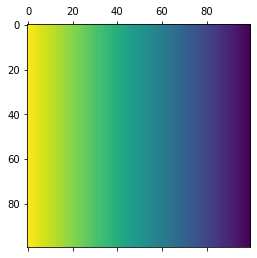

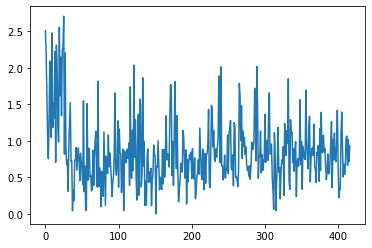

In [8]:
import matplotlib.pyplot as plt
plt.clf()
plt.matshow(np.array(im))#im,alpha = err)
plt.figure()
plt.plot(Yarr)

In [9]:
var.shape

TensorShape([100, 1, 1])

In [10]:
i = np.linspace(Xarr[:,0].min(), Xarr[:,0].max(), 100)
j = np.linspace(Xarr[:,1].min(), Xarr[:,1].max(), 100)
X, Y = np.meshgrid(i, j)
mean, var = m.predict_y(np.array([np.reshape(X,(-1,)).T,np.reshape(Y,(-1,))]).T)


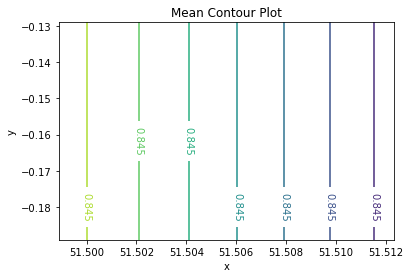

In [11]:
import matplotlib.pyplot as plt
plt.figure()
cp = plt.contour(X, Y, np.reshape(mean,(100,100)))
plt.clabel(cp, inline=True, 
          fontsize=10)
# plt.plot(X1[:,0],X1[:,1],'b.')
plt.title('Mean Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()